# KNN Regression

### 회귀(regression)분석
여러 변수 사이의 상관관계를 분석하여 임의의 수치를 예측하는 것

In [2]:
# 데아터 준비
import numpy as np
import matplotlib.pyplot as plt
perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0,
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5,
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5,
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0,
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0,
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )

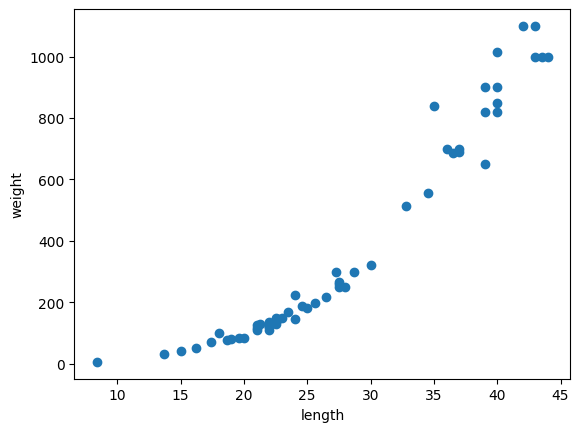

In [3]:
# 데이터 시각화
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [4]:
# 훈련 데이터와 테스트 데이터 나누기
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

In [8]:
# 사이킷런을 사용하려면 1차원 배열 데이터가 아니라 2차원 배열 데이터가 필요하다
# 따라서 reshape함수를 통해 훈련 데이터와 테스트 데이터를 2차원 배열로 만든다
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)
print(train_input.shape, test_input.shape)
print(train_input)
print(test_input)

(42, 1) (14, 1)
[[19.6]
 [22. ]
 [18.7]
 [17.4]
 [36. ]
 [25. ]
 [40. ]
 [39. ]
 [43. ]
 [22. ]
 [20. ]
 [22. ]
 [24. ]
 [27.5]
 [43. ]
 [40. ]
 [24. ]
 [21. ]
 [27.5]
 [40. ]
 [32.8]
 [26.5]
 [36.5]
 [13.7]
 [22.7]
 [15. ]
 [37. ]
 [35. ]
 [28.7]
 [23.5]
 [39. ]
 [21. ]
 [23. ]
 [22. ]
 [44. ]
 [22.5]
 [19. ]
 [37. ]
 [22. ]
 [25.6]
 [42. ]
 [34.5]]
[[ 8.4]
 [18. ]
 [27.5]
 [21.3]
 [22.5]
 [40. ]
 [30. ]
 [24.6]
 [39. ]
 [21. ]
 [43.5]
 [16.2]
 [28. ]
 [27.3]]


### reshape()
reshape 함수의 첫 번쨰 원소로 -1을 넣으면 뒤에 숫자의 차원에 맞춰 데이터를 배열하라는 뜻이다. 

예를 들어, 위의 reshape(-1. 1)은 원소를 한 개씩하여 2차원 배열을 만들라는 것이다.

예시)

a = np.array([1, 2, 3, 4])

b = a.reshape(-1, 2)

print(b)

예시에서의 출력은 [[1, 2], [3, 4]] 가 출력된다.


In [6]:
# 모델 훈련 및 평가
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()

knr.fit(train_input, train_target)

print(knr.score(test_input, test_target))

0.992809406101064


## 모델 평가 
### 결정계수

회귀 모델에서의 모델 평가는 정확도가 아니라 결정계수로 평가한다.

결정계수란 추정한 선형 모형이 주어진 자료에 적합한 정도를 재는 척도이다.

1에 가까울 수록 설명력이 높고, 0에 가까울 수록 설명력이 낮다.

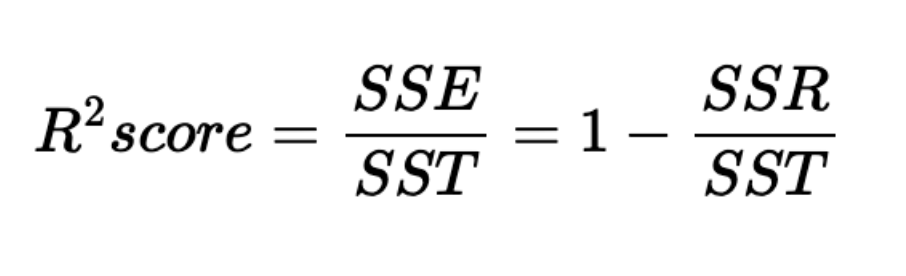
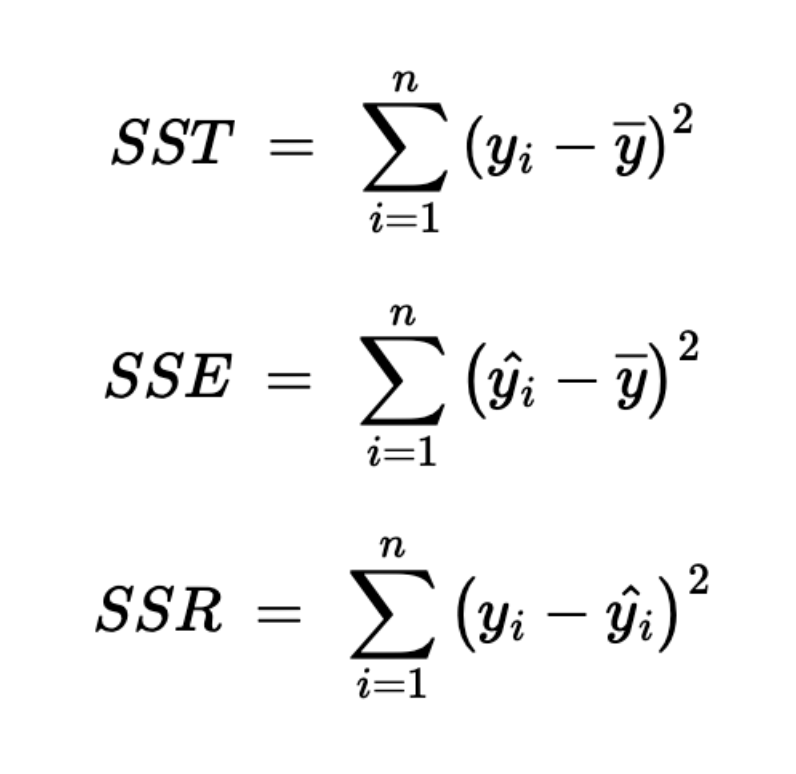

SST는 관측값에서 관측값의 평균을 뺀 값의 총 합이다.

SSE는 추정값에서 관측값의 평균을 뺀 값의 총 합이다.

SSR은 관측값에서 추정값을 뺀 값의 총 합이다.


In [7]:
# 다른 평가 지표 사용해 보기
from sklearn.metrics import mean_absolute_error
test_prediction = knr.predict(test_input)
mae = mean_absolute_error(test_target, test_prediction)
print(mae)

19.157142857142862


### mean_absolute_error
타깃과 예측의 절댓값 오차의 평균값을 반환

즉, 위 예시에서, 예측값이 19g 정도 타깃값과 차이가 난다는 것을 의미한다.

## 과대적합 vs 과소적합

In [9]:
#훈련 평가 지표 값 출력
print(knr.score(train_input, train_target))

0.9698823289099254


### 과대적합(overfitting)
모델이 훈련 세트에 과하게 적합한 상태가 되어 일반성이 떨어지는 현상이다.

새로운 데이터가 모델에 들어왔을 때 제대로 예측하지 못하는 현상이 일어난다.
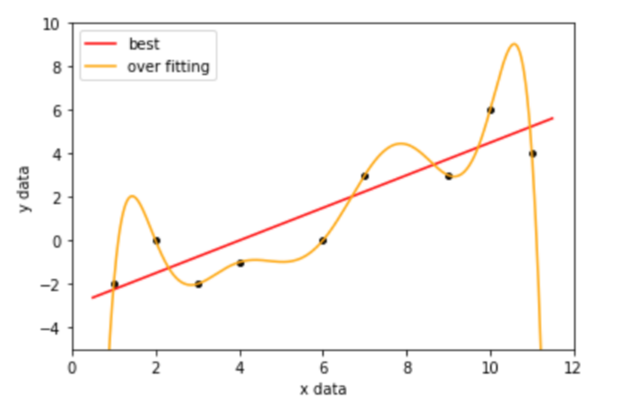
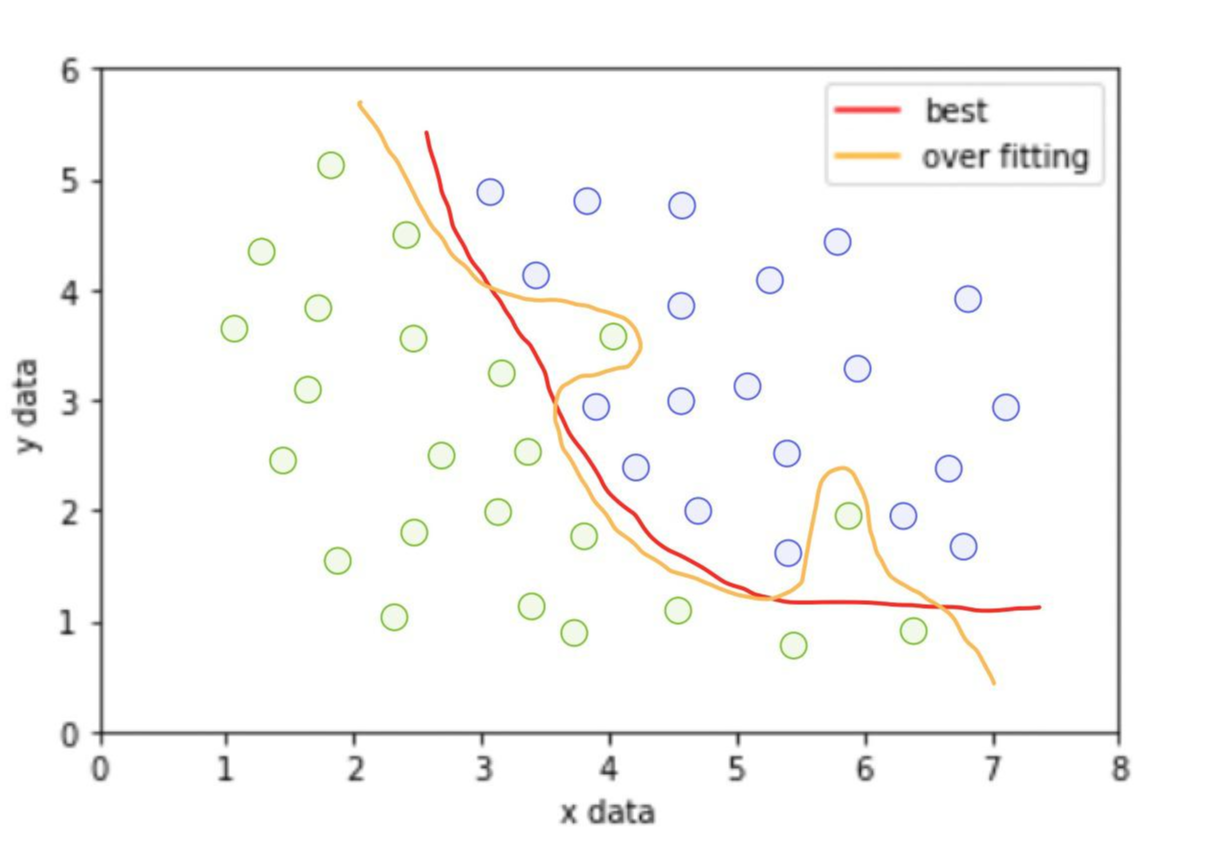


훈련 데이터 세트에서는 높은 정확도가 나타나고 검증, 테스트 데이터 세트에서는 낮은 정확도가 나타난다.

훈련 데이터 세트의 loss값은 낮게 나타나지만 검증, 테스트 데이터 세트의 loss값은 높게 나타난다.
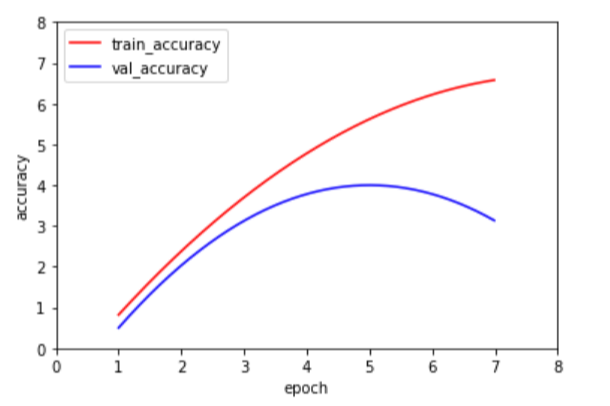
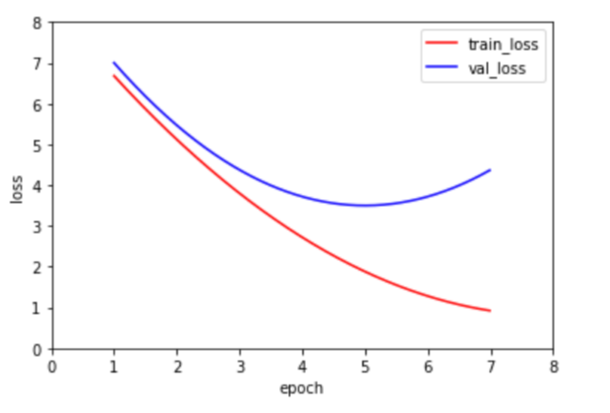

## 과소적합
과대적합과 반대로 모델이 훈련 데이터 세트의 규칙을 제대로 반영하지 못하여 성능이 떨어지는 것을 의미한다.
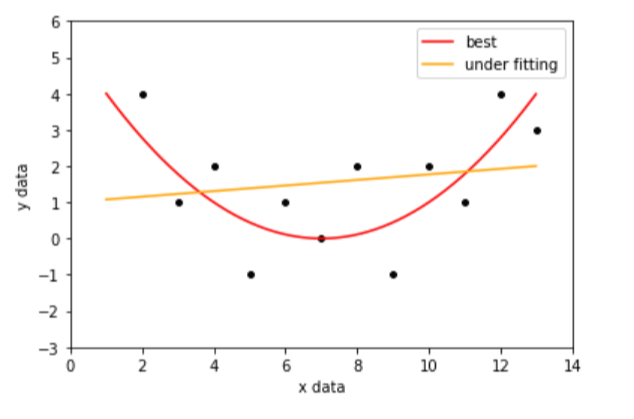
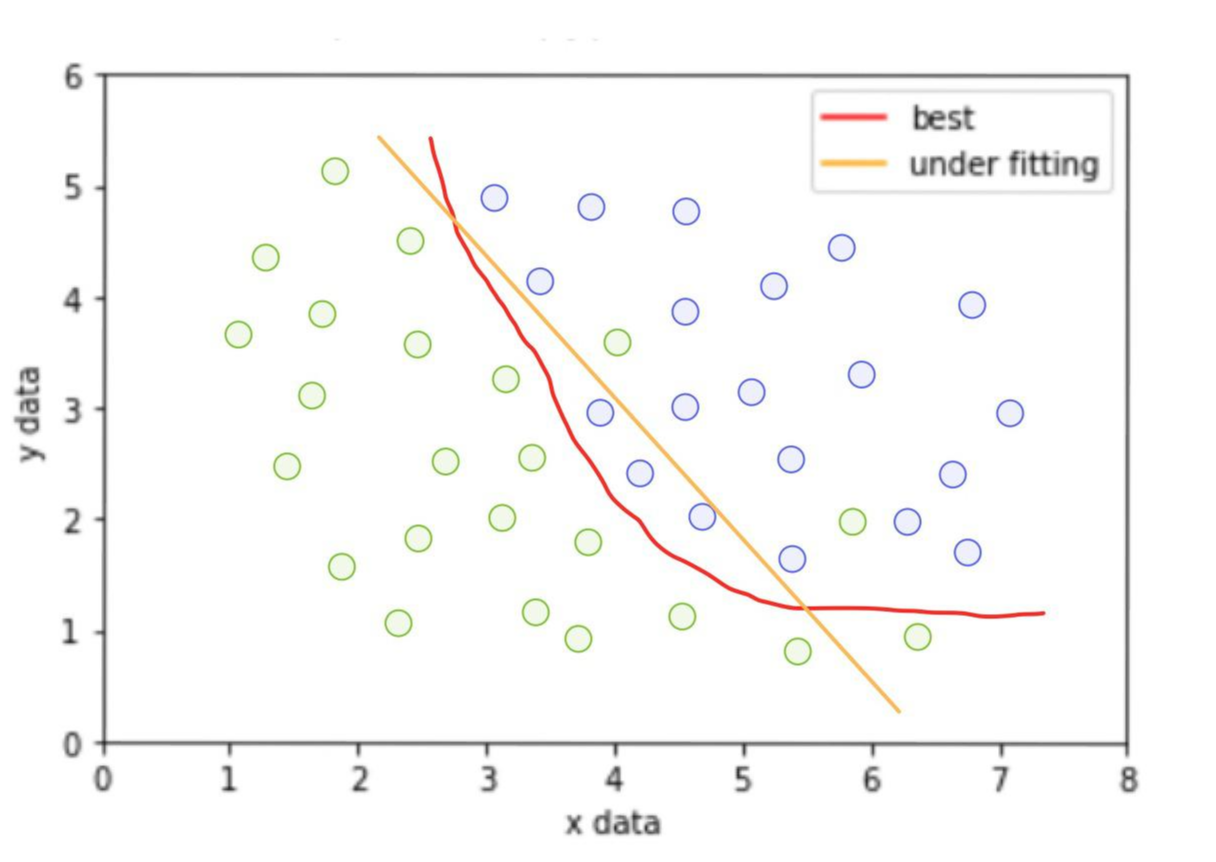

과소적합인 경우 훈련, 검증, 테스트 데이터 세트 정확도 모두 낮게 나타나고, loss값은 크게 나타난다.

KNNRegression 모델은 n_neighbors 값을 줄일 수록 모델 복잡도가 올라간다.


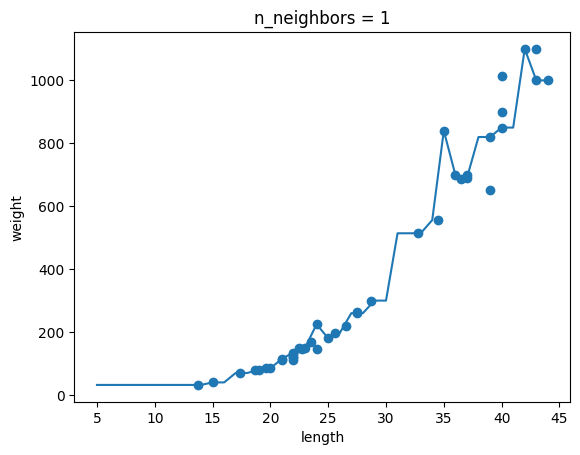

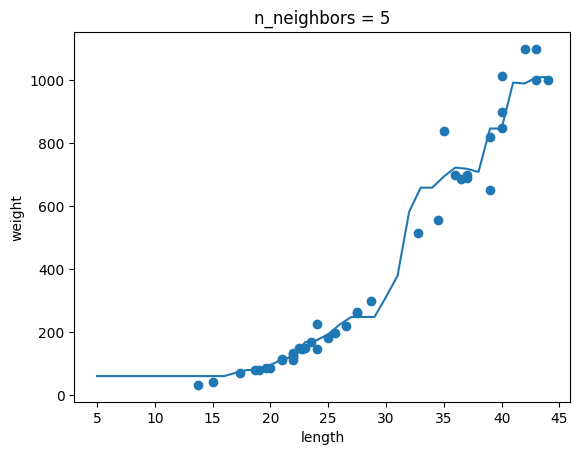

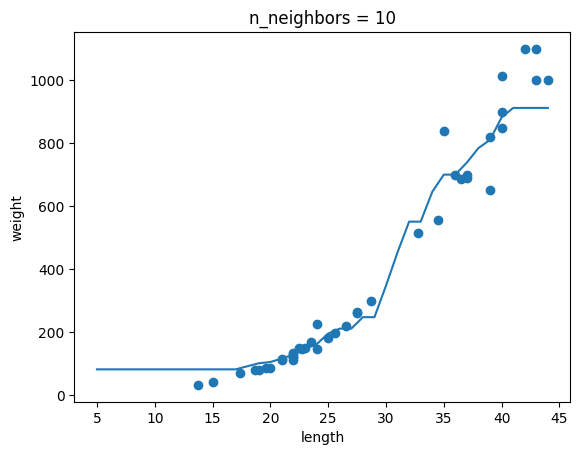

In [10]:
#확인문제
#n_neighbors 값을 1, 5, 10으로 바꿔가면서 n값이 커짐에 따라 모델이 단순해 지는지 확인하기
knr = KNeighborsRegressor()
x = np.arange(5, 45).reshape(-1, 1)

for n in [1, 5, 10]:
    knr.n_neighbors = n
    knr.fit(train_input, train_target)
    prediction = knr.predict(x)
    
    plt.scatter(train_input, train_target)
    plt.plot(x, prediction)
    plt.title('n_neighbors = {}'.format(n))
    plt.xlabel('length')
    plt.ylabel('weight')
    plt.show()

그래프를 통해 n값이 증가함에 따라 모델이 단순해 지는 것을 확인할 수 있음